# Project: Investing FBI NCIS Firearm Background Checks

## Table of Contents
<ul>
    
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data come from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn't otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov. 
>
> I will use the US Census Data and FBI NICS Background Check Data to explore following questions:
>
>1. Which states have had the highest and lowest rates of firearm background checks per capital in 2010 and 2016? 
>2. Which states have had the highest growth in firearm background checks per capital from 2010 to 2016? 

In [1]:
#Importing packages
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the U.S. Census Data and gun-data
df_1 = pd.read_csv('U.S. Census Data.csv')
df_2 = pd.read_csv('gun-data.csv')

<a id='wrangling'></a>
## Data Wrangling

### Explore the U.S Census data

In [2]:
df_1.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
df_1.tail(30)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
55,"All firms, 2012",NaN,"374,153","68,032","499,926","231,959","3,548,449","547,352","326,693","73,418",...,81314,550453,"2,356,748","251,419","75,827","653,193","541,522","114,435","432,980","62,427"
56,"Men-owned firms, 2012",NaN,"203,604","35,402","245,243","123,158","1,852,580","284,554","187,845","38,328",...,42418,302249,"1,251,696","132,163","41,270","353,012","262,650","63,112","236,252","30,039"
57,"Women-owned firms, 2012",NaN,"137,630","22,141","182,425","75,962","1,320,085","194,508","106,678","23,964",...,23722,195694,"866,678","76,269","23,417","236,290","187,677","39,065","133,859","19,344"
58,"Minority-owned firms, 2012",NaN,"92,219","13,688","135,313","35,982","1,619,857","85,849","56,113","14,440",...,4101,105234,"1,070,392","24,423","2,354","185,043","92,807","5,777","40,507","4,077"
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [4]:
df_1.shape

(85, 52)

In [5]:
#Features with missing values
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

### Explore the FBI NICS Background Check Data

In [6]:
df_2.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [7]:
df_2.tail(30)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12455,1998-11,Minnesota,9.0,NaN,27.0,280.0,NaN,3,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319
12456,1998-11,Mississippi,0.0,NaN,286.0,491.0,NaN,7,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784
12457,1998-11,Missouri,0.0,NaN,116.0,458.0,NaN,4,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578
12458,1998-11,Montana,0.0,NaN,101.0,98.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
12459,1998-11,Nebraska,88.0,NaN,1.0,96.0,NaN,1,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186
12460,1998-11,Nevada,0.0,NaN,75.0,76.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159
12461,1998-11,New Hampshire,0.0,NaN,8.0,46.0,NaN,1,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
12462,1998-11,New Jersey,0.0,NaN,20.0,53.0,NaN,2,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77
12463,1998-11,New Mexico,0.0,NaN,86.0,121.0,NaN,4,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211
12464,1998-11,New York,0.0,NaN,40.0,279.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319


In [8]:
df_2.shape

(12485, 27)

In [9]:
#Features with missing values
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

## Data Cleaning: US Census Data
   
### Drop rows and columns

> It appears that row 64 contains a 'FIPS Code', and rows 65-85 contains coded footnotes on the data. I have decided to drop these rows, as well as the 'Fact Note' column. 

In [10]:
#removing 'Fact Note' column
df_1.drop(['Fact Note'], axis=1, inplace= True)

In [11]:
#Dropping rows 64 to 85
df_1.drop(df_1.index[64:85], inplace= True)

In [12]:
#Transpose rows and columns to match it with NCIS gun data
df_1=df_1.T

In [13]:
#Check the changes
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"


### Fixing data type

>fixing all the data type from string to integer type. Since I am only interested in data in 2010 and 2016, so I will only convert thoes two colimns: 
>
> column[0] - Population estimates, July 1, 2016
>
> column[3] - Population, Census, April 1, 2010

In [14]:
#Remove commas from strings in column 0 and column 3
df_1[0] = df_1[0].str.replace(',','')
df_1[3] = df_1[3].str.replace(',','')

In [15]:
#Extract int from strings in column 0 and column 3
df_1[0] = df_1[0].str.extract('(\d+)').astype(int)
df_1[3] = df_1[3].str.extract('(\d+)').astype(int)

In [16]:
df_1.dtypes

0      int64
1     object
2     object
3      int64
4     object
       ...  
59    object
60    object
61    object
62    object
63    object
Length: 64, dtype: object

> I will create a new data frame that includes only 2010 and 2016 data. 

In [17]:
#Create a copy of df_1 as df_3
df_3 = df_1.copy()

In [18]:
#Dropping all columns from column 4:63
df_3.drop(df_3.columns[4:], axis=1, inplace=True)

In [19]:
#Droping cloumns 1,2
df_3.drop(df_3.columns[1:3], axis=1, inplace=True)

In [20]:
df_3.head()

,0,3
Fact,1,1
Alabama,4863300,4779736
Alaska,741894,710231
Arizona,6931071,6392017
Arkansas,2988248,2915918


In [21]:
#Rename the columns
df_3.columns = ['Population_estimates_July_1_2016', 'Population_Census_April_1_2010']

In [22]:
#Drop 'Fact' row
df_3.drop(['Fact'], inplace = True)

In [23]:
df_3.head()

,Population_estimates_July_1_2016,Population_Census_April_1_2010
Alabama,4863300,4779736
Alaska,741894,710231
Arizona,6931071,6392017
Arkansas,2988248,2915918
California,39250017,37253956


In [24]:
df_3.shape

(50, 2)

In [25]:
#Add a column 'state' by indexing in order to merge with gun data later 
df_3['state'] = df_3.index

In [26]:
#Check the change
df_3.head()

,Population_estimates_July_1_2016,Population_Census_April_1_2010,state
Alabama,4863300,4779736,Alabama
Alaska,741894,710231,Alaska
Arizona,6931071,6392017,Arizona
Arkansas,2988248,2915918,Arkansas
California,39250017,37253956,California


## Data Cleaning: FBI NCIS Fireman Background Check data
>
> My task will be create a new dataframe containing the annual total checks for each states in 2010 and 2016. 
> 
> Since I only concern with 'month','state','handgun','long_gun','other','multiple' in this dataset, so I will drop other columns first, then create a 'total_permits' column, which contains the total check of 'handgun','long_gun','other','multiple' in 2010 and 2016. 

In [27]:
#Drop columns after 'multiple'
df_2.drop(df_2.columns[8:],axis=1, inplace=True)

In [28]:
#Drop 'permit' and 'permit_recheck' columns
df_2.drop(['permit','permit_recheck'],axis=1,inplace=True)

In [29]:
df_2.head()

,month,state,handgun,long_gun,other,multiple
0,2017-09,Alabama,5734.0,6320.0,221.0,317
1,2017-09,Alaska,2320.0,2930.0,219.0,160
2,2017-09,Arizona,11063.0,7946.0,920.0,631
3,2017-09,Arkansas,4347.0,6063.0,165.0,366
4,2017-09,California,37165.0,24581.0,2984.0,0


### Fixing data type

In [30]:
df_2.dtypes

month        object
state        object
handgun     float64
long_gun    float64
other       float64
multiple      int64
dtype: object

In [31]:
#Drop all null values 'NaN' in 'other' column and replace with 0.0
df_2.fillna(0, inplace=True)

In [32]:
df_2.isnull().any()

month       False
state       False
handgun     False
long_gun    False
other       False
multiple    False
dtype: bool

In [33]:
#Convert 'handgun','long_gun','other' columns to int

df_2['handgun']=df_2['handgun'].astype(int)
df_2['long_gun']=df_2['long_gun'].astype(int)
df_2['other']=df_2['other'].astype(int)

In [34]:
df_2.dtypes

month       object
state       object
handgun      int64
long_gun     int64
other        int64
multiple     int64
dtype: object

### Filter by year: 2010 and 2016

In [35]:
#Checking data for the year 2016
df_4 = df_2[df_2.month.str.contains('2016',case=True)]

In [36]:
df_4.head()

,month,state,handgun,long_gun,other,multiple
495,2016-12,Alabama,13733,17519,376,533
496,2016-12,Alaska,4087,3698,243,191
497,2016-12,Arizona,18024,13785,1180,703
498,2016-12,Arkansas,9192,13433,277,385
499,2016-12,California,63649,93224,77929,0


In [37]:
df_4.month

495     2016-12
496     2016-12
497     2016-12
498     2016-12
499     2016-12
         ...   
1150    2016-01
1151    2016-01
1152    2016-01
1153    2016-01
1154    2016-01
Name: month, Length: 660, dtype: object

In [38]:
#Create datetime variable from month
df_4['date'] = pd.to_datetime(df_4.month, format = "%Y-%m")

#Extract year from date
df_4['year'] = df_4['date'].dt.year
df_4['year']

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


495     2016
496     2016
497     2016
498     2016
499     2016
        ... 
1150    2016
1151    2016
1152    2016
1153    2016
1154    2016
Name: year, Length: 660, dtype: int64

In [39]:
df_4.head()

,month,state,handgun,long_gun,other,multiple,date,year
495,2016-12,Alabama,13733,17519,376,533,2016-12-01,2016
496,2016-12,Alaska,4087,3698,243,191,2016-12-01,2016
497,2016-12,Arizona,18024,13785,1180,703,2016-12-01,2016
498,2016-12,Arkansas,9192,13433,277,385,2016-12-01,2016
499,2016-12,California,63649,93224,77929,0,2016-12-01,2016


In [40]:
#Create new columns 'total_permits' for each row in 2016
df_4.insert(1, "total_permits", 0)

In [41]:
#Add the sum of 'handgun', 'long_gun', 'other', and 'multiple' to new column 'total_permits'
df_4['total_permits'] = df_4.apply(lambda row: row['handgun'] + row['long_gun'] + row['other'] + row['multiple'], axis=1)

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df_4.head()

,month,total_permits,state,handgun,long_gun,other,multiple,date,year
495,2016-12,32161,Alabama,13733,17519,376,533,2016-12-01,2016
496,2016-12,8219,Alaska,4087,3698,243,191,2016-12-01,2016
497,2016-12,33692,Arizona,18024,13785,1180,703,2016-12-01,2016
498,2016-12,23287,Arkansas,9192,13433,277,385,2016-12-01,2016
499,2016-12,234802,California,63649,93224,77929,0,2016-12-01,2016


In [43]:
#Calculate the total_permits of each state
df_4.groupby('state')['total_permits'].sum()

state
Alabama                  287735
Alaska                    79583
Arizona                  296802
Arkansas                 169823
California              1326612
Colorado                 452711
Connecticut              168633
Delaware                  49622
District of Columbia        731
Florida                 1046121
Georgia                  337029
Guam                       2122
Hawaii                        0
Idaho                    107324
Illinois                 541799
Indiana                  482246
Iowa                      38507
Kansas                   164458
Kentucky                 260580
Louisiana                330739
Maine                    101115
Mariana Islands              17
Maryland                 126323
Massachusetts            127484
Michigan                 303164
Minnesota                292840
Mississippi              221216
Missouri                 507619
Montana                   99201
Nebraska                  28553
Nevada                   111373
Ne

In [44]:
#Put the groupby values to the '2016_total_Permits' column
df_4['2016_total_permits'] = df_4.groupby('state')['total_permits'].transform('sum')

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df_4.head()

,month,total_permits,state,handgun,long_gun,other,multiple,date,year,2016_total_permits
495,2016-12,32161,Alabama,13733,17519,376,533,2016-12-01,2016,287735
496,2016-12,8219,Alaska,4087,3698,243,191,2016-12-01,2016,79583
497,2016-12,33692,Arizona,18024,13785,1180,703,2016-12-01,2016,296802
498,2016-12,23287,Arkansas,9192,13433,277,385,2016-12-01,2016,169823
499,2016-12,234802,California,63649,93224,77929,0,2016-12-01,2016,1326612


In [46]:
#Drop redundant columns, only left column 'state' and '2016_total_permits'
df_4.drop(['month','total_permits','handgun','long_gun','other','multiple','date','year'],axis=1,inplace=True)

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
df_4.head()

,state,2016_total_permits
495,Alabama,287735
496,Alaska,79583
497,Arizona,296802
498,Arkansas,169823
499,California,1326612


In [48]:
#Check is there any null values 
df_4.isnull().any()

state                 False
2016_total_permits    False
dtype: bool

In [49]:
df_4.shape

(660, 2)

> Do the same to create the 2010 gun data

In [50]:
#Checking data for the year 2010
df_5 = df_2[df_2.month.str.contains('2010',case=True)]

In [51]:
df_5.head()

,month,state,handgun,long_gun,other,multiple
4455,2010-12,Alabama,13978,24298,152,569
4456,2010-12,Alaska,2553,3950,93,146
4457,2010-12,Arizona,9943,9814,219,431
4458,2010-12,Arkansas,5816,12455,62,257
4459,2010-12,California,24519,32100,0,0


In [52]:
df_5.month

4455    2010-12
4456    2010-12
4457    2010-12
4458    2010-12
4459    2010-12
         ...   
5110    2010-01
5111    2010-01
5112    2010-01
5113    2010-01
5114    2010-01
Name: month, Length: 660, dtype: object

In [53]:
#Create datetime variable from month
df_5['date'] = pd.to_datetime(df_5.month, format = "%Y-%m")

#Extract year from date
df_5['year'] = df_5['date'].dt.year
df_5['year']

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


4455    2010
4456    2010
4457    2010
4458    2010
4459    2010
        ... 
5110    2010
5111    2010
5112    2010
5113    2010
5114    2010
Name: year, Length: 660, dtype: int64

In [54]:
#Create new columns 'total_permits' for each row in 2010
df_5.insert(1, "total_permits", 0)

In [58]:
#Add the sum of 'handgun', 'long_gun', 'other', and 'multiple' to new column 'total_permits'
df_5['total_permits'] = df_5.apply(lambda row: row['handgun'] + row['long_gun'] + row['other'] + row['multiple'], axis=1)


/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
df_5.head()

,month,total_permits,state,handgun,long_gun,other,multiple,date,year
4455,2010-12,38997,Alabama,13978,24298,152,569,2010-12-01,2010
4456,2010-12,6742,Alaska,2553,3950,93,146,2010-12-01,2010
4457,2010-12,20407,Arizona,9943,9814,219,431,2010-12-01,2010
4458,2010-12,18590,Arkansas,5816,12455,62,257,2010-12-01,2010
4459,2010-12,56619,California,24519,32100,0,0,2010-12-01,2010


In [60]:
df_5.groupby('state')['total_permits'].sum()

state
Alabama                 260718
Alaska                   61241
Arizona                 164088
Arkansas                125979
California              520617
Colorado                287891
Connecticut              88561
Delaware                 19240
District of Columbia       319
Florida                 534587
Georgia                 200187
Guam                       542
Hawaii                       0
Idaho                    67040
Illinois                231601
Indiana                 234059
Iowa                     41172
Kansas                  130008
Kentucky                191291
Louisiana               214671
Maine                    63092
Mariana Islands              0
Maryland                 85849
Massachusetts            57410
Michigan                149522
Minnesota               179841
Mississippi             135592
Missouri                301196
Montana                  75857
Nebraska                 29181
Nevada                   86445
New Hampshire            56983
Ne

In [61]:
#Put the groupby values to the '2010_total_Permits' column
df_5['2010_total_permits'] = df_5.groupby('state')['total_permits'].transform('sum')

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
#Drop redundant columns, only left column 'state' and '2010_total_permits'
df_5.drop(['month','total_permits','handgun','long_gun','other','multiple','date','year'],axis=1,inplace=True)

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
df_5.head()

,state,2010_total_permits
4455,Alabama,260718
4456,Alaska,61241
4457,Arizona,164088
4458,Arkansas,125979
4459,California,520617


In [64]:
#Check is there any null values 
df_5.isnull().any()

state                 False
2010_total_permits    False
dtype: bool

In [65]:
df_5.shape

(660, 2)

### Combine two Dataframes
>
> Combine the 2010 and 2016 dataframes together.
>
> Before merge, I need to make sure there is no duplicates in 2010 and 2016 data frames. 

In [66]:
#Check the duplicates for 2016 gun data 
df_4.duplicated()

495     False
496     False
497     False
498     False
499     False
        ...  
1150     True
1151     True
1152     True
1153     True
1154     True
Length: 660, dtype: bool

In [67]:
#Check the duplicates for 2010 gun data
df_5.duplicated()

4455    False
4456    False
4457    False
4458    False
4459    False
        ...  
5110     True
5111     True
5112     True
5113     True
5114     True
Length: 660, dtype: bool

In [68]:
#Drop the duplicates for 2016 gun data
df_4.drop_duplicates(inplace=True)

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
#Drop the duplicates for 2010 gun data
df_5.drop_duplicates(inplace=True)

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
#Reset the 2016 dataframe index
df_4 = df_4.reset_index(drop = True)

In [71]:
#Reset the 2010 dataframe index
df_5 = df_5.reset_index(drop = True)

In [72]:
#Merge the two dataframes
df_merge = pd.merge(df_4, df_5, on=['state'], how='inner', indicator=True)

In [74]:
df_merge.head()

,state,2016_total_permits,2010_total_permits,_merge
0,Alabama,287735,260718,both
1,Alaska,79583,61241,both
2,Arizona,296802,164088,both
3,Arkansas,169823,125979,both
4,California,1326612,520617,both


In [75]:
#Check for success
df_merge.shape

(55, 4)

In [76]:
df_merge.tail(30)

,state,2016_total_permits,2010_total_permits,_merge
25,Minnesota,292840,179841,both
26,Mississippi,221216,135592,both
27,Missouri,507619,301196,both
28,Montana,99201,75857,both
29,Nebraska,28553,29181,both
30,Nevada,111373,86445,both
31,New Hampshire,115471,56983,both
32,New Jersey,121853,50513,both
33,New Mexico,133754,88293,both
34,New York,345921,211246,both


### Combine the US Census Data with FBI Background Checks Gun Data
> 
> I find the US census data have 50 rows, but the gun data have 55 rows, it means there are 5 states don't have sensus data, for those data I will find it out but ignore it. Since I can merge with 'left'- the census data, so the final dataframe without thoes 5 states values.  

In [77]:
#Find the state that don't have census data
df_merge[~df_merge.state.isin(df_3.state)]

,state,2016_total_permits,2010_total_permits,_merge
8,District of Columbia,731,319,both
11,Guam,2122,542,both
21,Mariana Islands,17,0,both
41,Puerto Rico,15778,8078,both
49,Virgin Islands,328,237,both


In [78]:
#Merge the two dataframes with left
df_final = pd.merge(df_3, df_merge, on=['state'], how='left')

In [79]:
df_final.head()

,Population_estimates_July_1_2016,Population_Census_April_1_2010,state,2016_total_permits,2010_total_permits,_merge
0,4863300,4779736,Alabama,287735,260718,both
1,741894,710231,Alaska,79583,61241,both
2,6931071,6392017,Arizona,296802,164088,both
3,2988248,2915918,Arkansas,169823,125979,both
4,39250017,37253956,California,1326612,520617,both


In [80]:
df_final.shape

(50, 6)

<a id='eda'></a>
## Exploratory Data Analysis

In [81]:
#Create per capita 2016 column
df_final.insert(5, "Per_capita_permits_2016",0)

#Create per capita 2010 column
df_final.insert(6, "Per_capita_permits_2010",0)

#Create per capita growth rate column
df_final.insert(7, "Per_capita_permit_growth_rate",0)

In [82]:
#Calculate gun permit checks per capita in 2016
df_final['Per_capita_permits_2016'] = df_final['2016_total_permits'].divide(df_final['Population_estimates_July_1_2016'] + 0.01) *100


In [83]:
#Calualate gun permit checks per capita in 2010
df_final['Per_capita_permits_2010'] = df_final['2010_total_permits'].divide(df_final['Population_Census_April_1_2010'] + 0.01) *100


In [84]:
#Calculate per capita gun permit checks growth rates from 2010 to 2016
df_final['Per_capita_permit_growth_rate'] = ((df_final['2016_total_permits']-df_final['2010_total_permits'])/df_final['2010_total_permits'] + 0.01)*100 


In [85]:
#Visual check
df_final.head(20)

,Population_estimates_July_1_2016,Population_Census_April_1_2010,state,2016_total_permits,2010_total_permits,Per_capita_permits_2016,Per_capita_permits_2010,Per_capita_permit_growth_rate,_merge
0,4863300,4779736,Alabama,287735,260718,5.916456,5.454653,11.362537,both
1,741894,710231,Alaska,79583,61241,10.727004,8.622687,30.950523,both
2,6931071,6392017,Arizona,296802,164088,4.282195,2.567077,81.879772,both
3,2988248,2915918,Arkansas,169823,125979,5.683029,4.320389,35.802626,both
4,39250017,37253956,California,1326612,520617,3.379902,1.397481,155.815344,both
5,5540545,5029196,Colorado,452711,287891,8.170875,5.724394,58.250835,both
6,3576452,3574097,Connecticut,168633,88561,4.715092,2.477857,91.414517,both
7,952065,897934,Delaware,49622,19240,5.212039,2.142696,158.910603,both
8,20612439,18801310,Florida,1046121,534587,5.075193,2.843350,96.687699,both
9,10310371,9687653,Georgia,337029,200187,3.268835,2.066414,69.357086,both


In [90]:
df_final.dropna(inplace=True)

In [91]:
#Find the state with the highest per capita permit checks in 2016
df_final.loc[df_final['Per_capita_permits_2016'].idxmax()]

Population_estimates_July_1_2016     741894
Population_Census_April_1_2010       710231
state                                Alaska
2016_total_permits                    79583
2010_total_permits                    61241
Per_capita_permits_2016              10.727
Per_capita_permits_2010             8.62269
Per_capita_permit_growth_rate       30.9505
_merge                                 both
Name: 1, dtype: object

In [92]:
#Find the state with the lowest per capita permit checks in 2016
df_final.loc[df_final['Per_capita_permits_2016'].idxmin()]

Population_estimates_July_1_2016    3134693
Population_Census_April_1_2010      3046355
state                                  Iowa
2016_total_permits                    38507
2010_total_permits                    41172
Per_capita_permits_2016             1.22841
Per_capita_permits_2010             1.35152
Per_capita_permit_growth_rate      -5.47285
_merge                                 both
Name: 14, dtype: object

In [93]:
#Find state with the highest per capita permit checks in 2010
df_final.loc[df_final['Per_capita_permits_2010'].idxmax()]

Population_estimates_July_1_2016     741894
Population_Census_April_1_2010       710231
state                                Alaska
2016_total_permits                    79583
2010_total_permits                    61241
Per_capita_permits_2016              10.727
Per_capita_permits_2010             8.62269
Per_capita_permit_growth_rate       30.9505
_merge                                 both
Name: 1, dtype: object

In [94]:
#Find state with the lowest per capita permit checks in 2010
df_final.loc[df_final['Per_capita_permits_2010'].idxmin()]

Population_estimates_July_1_2016       8944469
Population_Census_April_1_2010         8791894
state                               New Jersey
2016_total_permits                      121853
2010_total_permits                       50513
Per_capita_permits_2016                1.36233
Per_capita_permits_2010               0.574541
Per_capita_permit_growth_rate          142.231
_merge                                    both
Name: 29, dtype: object

In [95]:
#Find the state with the highest growth rate
df_final.loc[df_final['Per_capita_permit_growth_rate'].idxmax()]

Population_estimates_July_1_2016      952065
Population_Census_April_1_2010        897934
state                               Delaware
2016_total_permits                     49622
2010_total_permits                     19240
Per_capita_permits_2016              5.21204
Per_capita_permits_2010               2.1427
Per_capita_permit_growth_rate        158.911
_merge                                  both
Name: 7, dtype: object

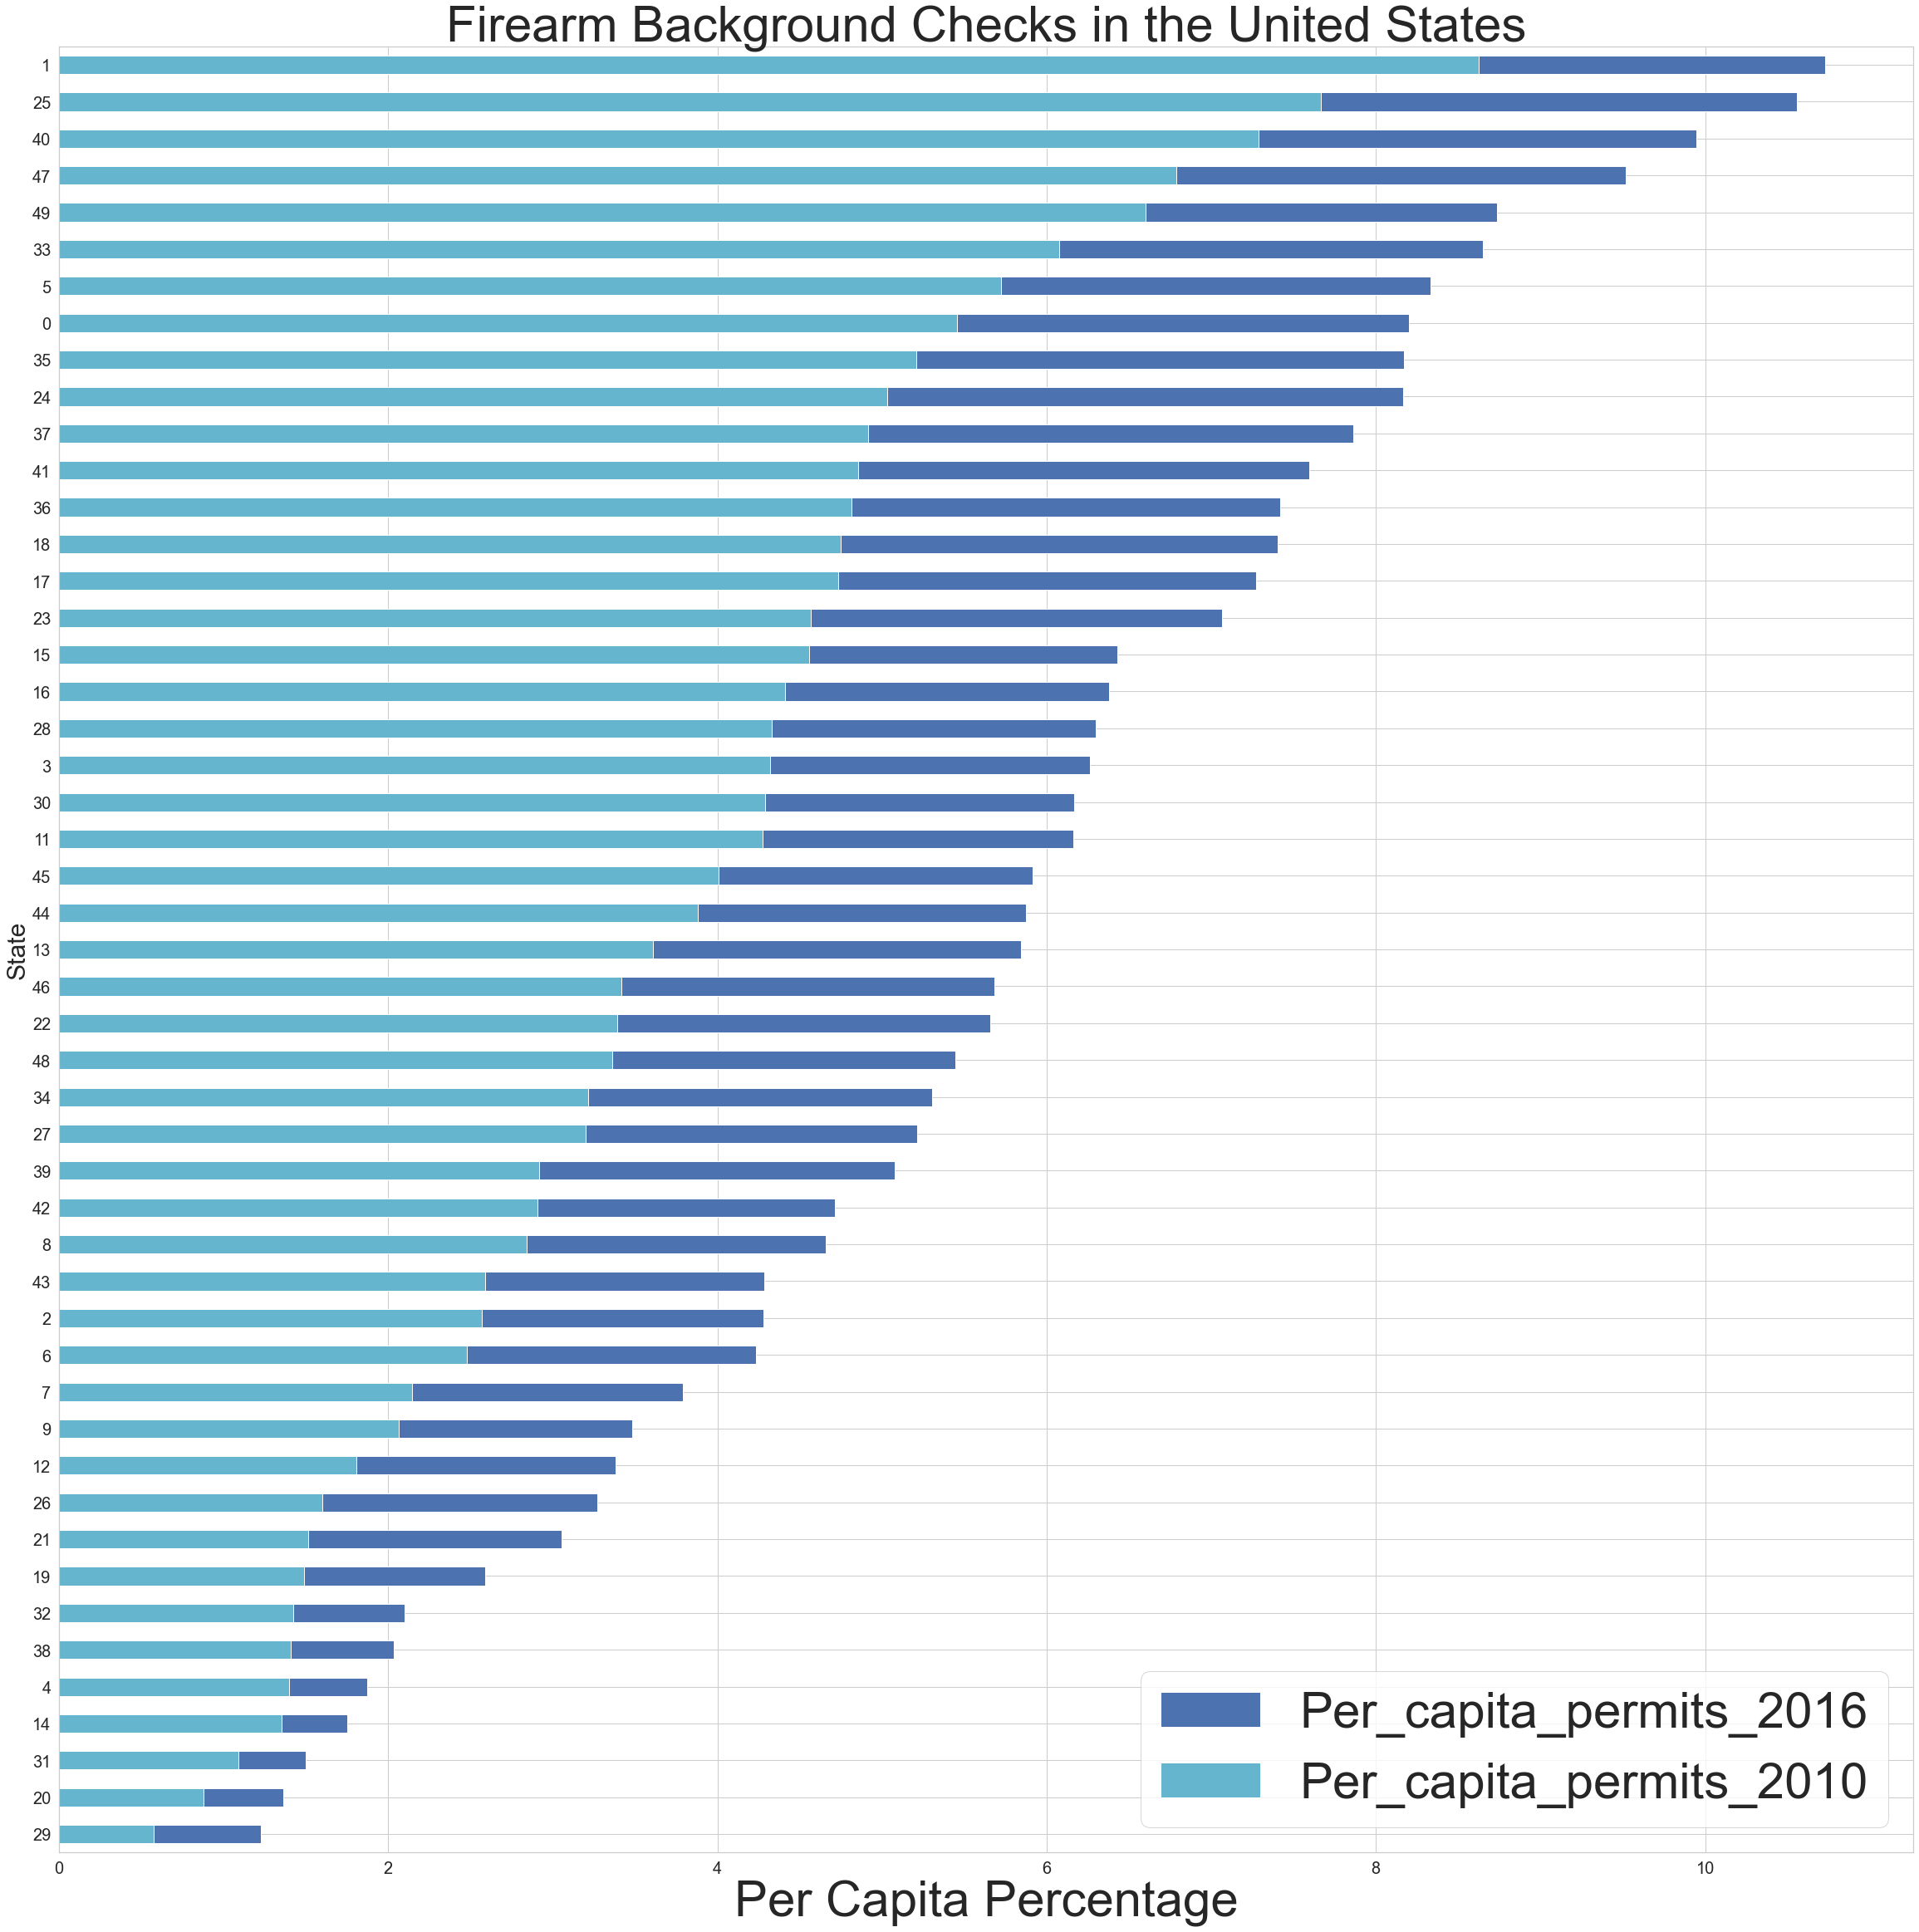

In [102]:
#Plote per capita permits check in ascending order 
f, ax = plt.subplots(figsize=(40, 40))
sns.set(style="whitegrid")

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

per_capita_2016 = df_final.loc[:,'Per_capita_permits_2016'].sort_values(ascending=True,)
per_capita_2010 = df_final.loc[:,'Per_capita_permits_2010'].sort_values(ascending=True,)
per_capita_2016.plot(kind='barh', color='b')
per_capita_2010.plot(kind='barh', color = 'c')

plt.legend(prop={'size': 60})

ax.set_xlabel('Per Capita Percentage', fontsize=60)
ax.set_ylabel('State', fontsize=30)

ax.set_title('Firearm Background Checks in the United States', fontsize=60);

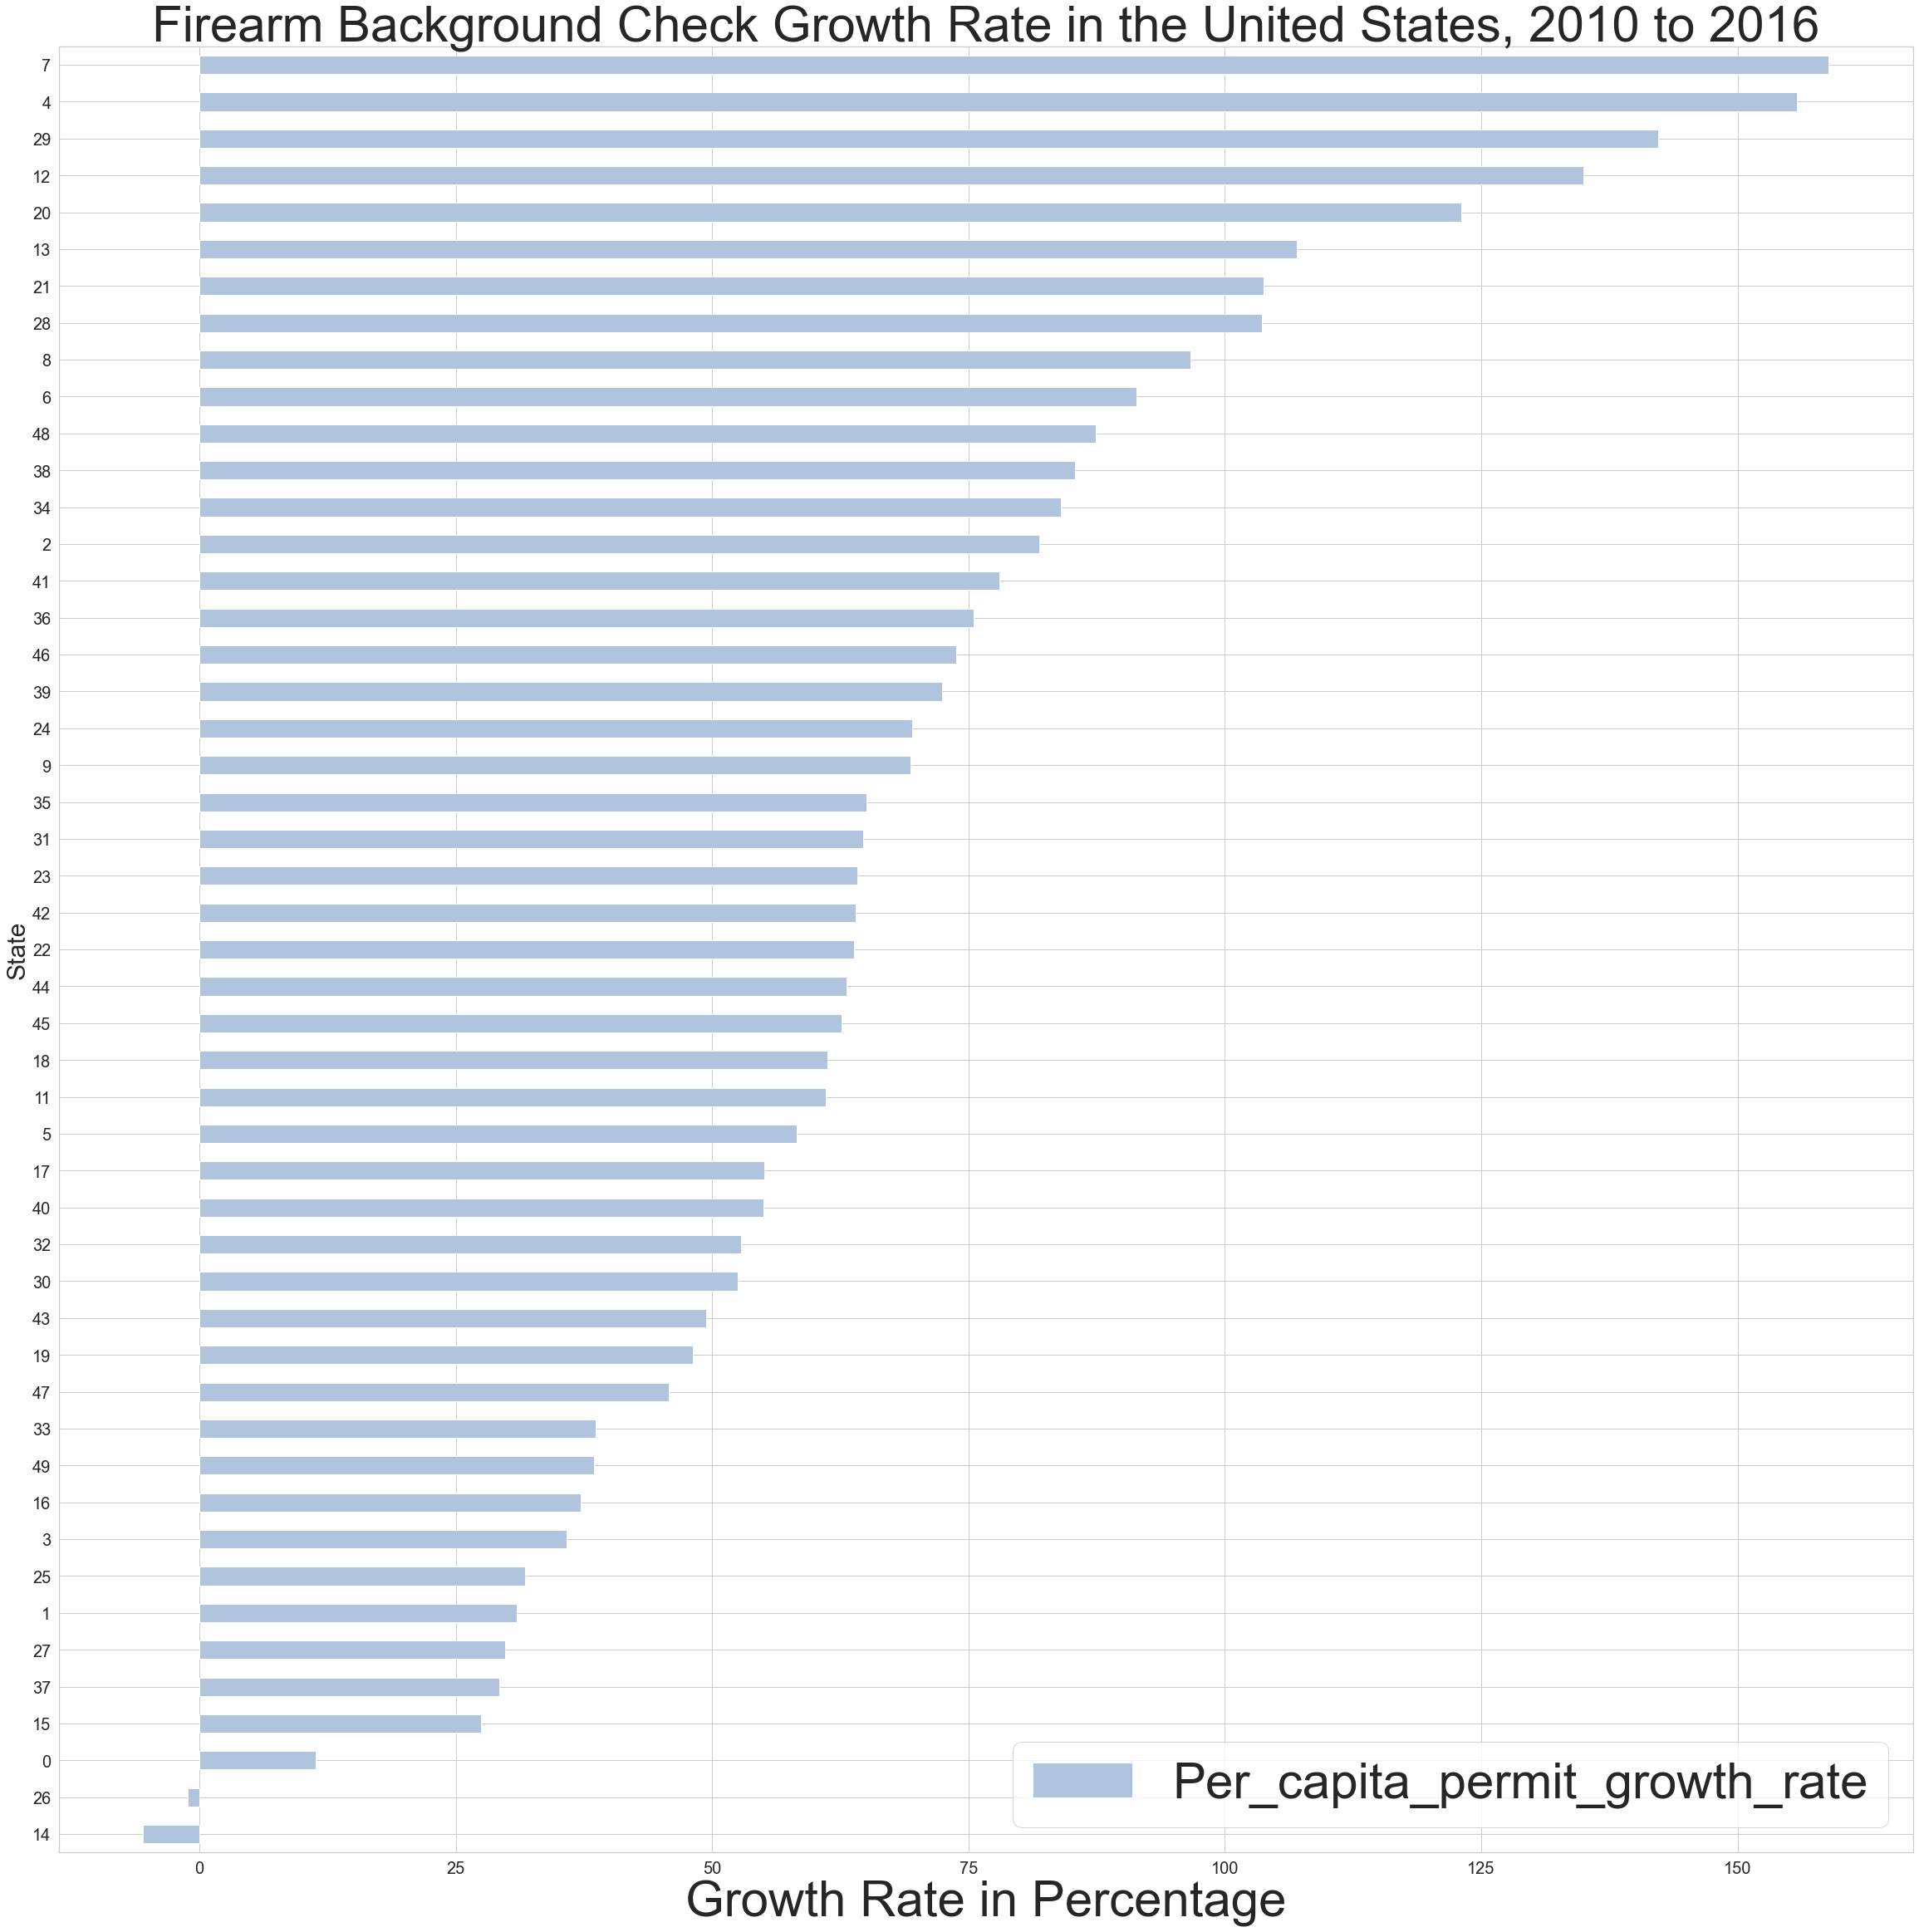

In [101]:
#Plotting per capita background checks in ascending order
f, ax = plt.subplots(figsize=(40, 40))
sns.set(style="whitegrid")

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

per_capita_growth = df_final.loc[:,'Per_capita_permit_growth_rate'].sort_values(ascending=True,)
per_capita_growth.plot(kind='barh', color='lightsteelblue')


plt.legend(prop={'size': 60})

ax.set_xlabel('Growth Rate in Percentage', fontsize=60)
ax.set_ylabel('State', fontsize=30)
ax.set_title('Firearm Background Check Growth Rate in the United States, 2010 to 2016', fontsize=60);

<a id='conclusions'></a>
## Conclusions 

### For question 1: Which states have had the highest and lowest rates of firearm background checks per capital in 2010 and 2016? 
>
> The 1st graph shows the number of permits, per capita, for each state, in 2010 and 2016. 
>
> Alaska have the highest per capita background checks in 2010 and 2016; 
> 
> New Jersery have the lowest per capita background checks in 2010, and Lowa have the lowest per capita background checks in 2016; 

### For question 2: Which states have had the highest growth in firearm background checks per capital from 2010 to 2016? 
>
> The 2nd graph shows that Delaware have the highest background check growth rate from 2010 to 2016. 
> 